In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [2]:
df1 = pd.read_csv('layoffs.csv')

# Load the second CSV file
df2 = pd.read_csv('layoffs_data.csv')

In [3]:
df = pd.concat([df1, df2], ignore_index=True)

In [13]:
df.shape

(6798, 6)

In [26]:
df

,location,industry,total_laid_off,percentage_laid_off,date,country
0,Hamburg,Consumer,400.0,NaN,2024-01-11,Germany
1,Tel Aviv,Consumer,300.0,0.10,2024-01-11,Israel
2,SF Bay Area,Consumer,170.0,0.17,2024-01-11,United States
3,Bengaluru,Marketing,125.0,0.05,2024-01-11,India
4,New York City,Media,100.0,0.05,2024-01-11,United States
...,...,...,...,...,...,...
6793,Los Angeles,Travel,NaN,1.00,2020-03-16,United States
6794,Los Angeles,Transportation,8.0,0.10,2020-03-13,United States
6795,SF Bay Area,Consumer,6.0,0.75,2020-03-13,United States
6796,Los Angeles,Retail,20.0,0.40,2020-03-12,United States


In [5]:
# Check for NaN values in the 'country' column
nan_values = df[df['country'].isna()]

# Check the data type of values in the 'country' column
data_type = df['country'].dtype

print("NaN Values:")
print(nan_values)
print("\nData Type:")
print(data_type)

NaN Values:
Empty DataFrame
Columns: [location, industry, total_laid_off, percentage_laid_off, date, country]
Index: []

Data Type:
object


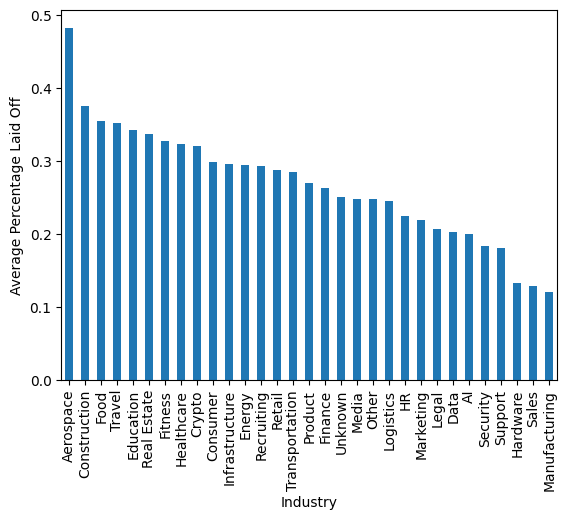

In [25]:
# @title Highest Percentage Laid Off by Industry

import matplotlib.pyplot as plt
df.groupby('industry')['percentage_laid_off'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Industry')
_ = plt.ylabel('Average Percentage Laid Off')

<Axes: xlabel='industry'>

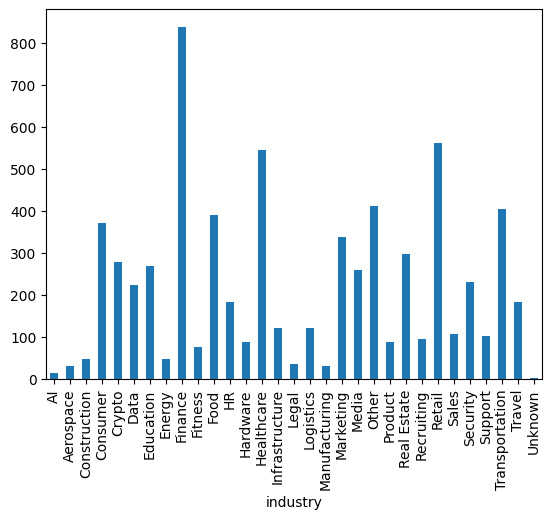

In [21]:
# @title Total companies laying off employees per industry

df.groupby('industry')['location'].count().plot(kind='bar')

<Axes: xlabel='date'>

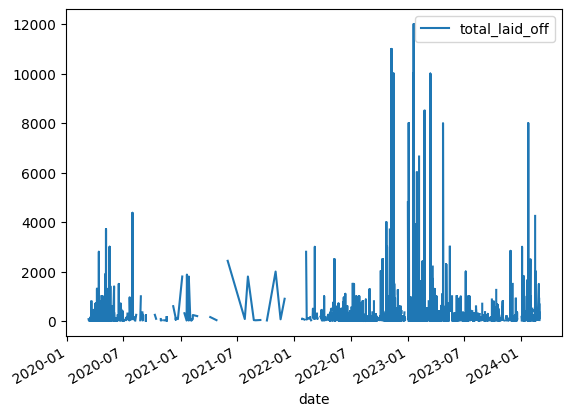

In [20]:
# @title Total Laid Off Over Time

df.plot(x='date', y='total_laid_off', kind='line')

In [15]:
# Function to update bar chart based on location selection
def update_bar_chart(location):
    plt.figure(figsize=(10, 6))
    df_location = df[df['location'] == location]
    plt.bar(df_location['industry'], df_location['total_laid_off'])
    plt.title(f'Total Employees Laid Off in {location}')
    plt.xlabel('Industry')
    plt.ylabel('Total Laid Off')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
# Dropdown widget for selecting location
location_dropdown = widgets.Dropdown(options=df['location'].unique(), description='Location')

# Call update_bar_chart function when location dropdown value changes
widgets.interactive(update_bar_chart, location=location_dropdown)

interactive(children=(Dropdown(description='Location', options=('Hamburg', 'Tel Aviv', 'SF Bay Area', 'Bengalu…

In [ ]:
unique_countries = df['country'].unique()
print(unique_countries)

['Germany' 'Israel' 'United States' 'India' 'Japan' 'Canada'
 'United Kingdom' 'China' 'Poland' 'Nigeria' 'Sweden' 'Estonia' 'Romania'
 'Singapore' 'Finland' 'France' 'Netherlands' 'Switzerland' 'Indonesia'
 'Brazil' 'Ghana' 'Czech Republic' 'Hong Kong' 'Kenya' 'Norway' 'Spain'
 'Australia' 'Ireland' 'New Zealand' 'Luxembourg' 'Cayman Islands'
 'Mexico' 'South Korea' 'Chile' 'Saudi Arabia' 'Philippines' 'Austria'
 'Ukraine' 'Italy' 'Portugal' 'Colombia' 'Argentina' 'Seychelles' 'Egypt'
 'Greece' 'Belgium' 'Denmark' 'Malaysia' 'Hungary' 'Vietnam' 'Thailand'
 'Lithuania' 'Senegal' 'Pakistan' 'United Arab Emirates' 'Peru' 'Bahrain'
 'Turkey' 'Russia' 'Uruguay' 'Bulgaria' 'South Africa' 'Myanmar']


In [10]:
from ipywidgets import interact
def update_bar_chart(country):
    plt.figure(figsize=(8, 6))
    df_country = df[df['country'] == country]
    plt.bar(df_country['location'], df_country['total_laid_off'])
    plt.title(f'Total Employees Laid Off in {country}')
    plt.xlabel('Location')
    plt.ylabel('Total Laid Off')
    plt.xticks(rotation=45)
    plt.show()

# Dropdown widget for selecting country
country_dropdown = widgets.Dropdown(options=df['country'].unique(), description='Country')

# Call update_bar_chart function when country dropdown value changes
widgets.interactive(update_bar_chart, country=country_dropdown)


interactive(children=(Dropdown(description='Country', options=('Germany', 'Israel', 'United States', 'India', …

In [34]:
df.to_csv('layoffs_clean.csv', index=False)